# **Simulación de una Cadena de Markov**

In [12]:
library('dplyr')
library('tidyr')
library('ggplot2')
#install.packages('diagram')
library('diagram')

In [13]:
# Función para calcular la potencia de una matriz
mmult <- function(m, n){
  # inputs:
  #   m : matriz 
  #   n : potencia
  # outputs:
  #   Mn : matriz potencia n
  for(i in 1:n){
    if(i == 1){
      Mn <- m
    }else{
      Mn <- Mn%*%m
    }
  }
  return(Mn)
}

In [14]:
# Función para generar trajectorias de una Cadena de Markov
sim.MarkovChain <- function(P, d, n=100){
  # Inputs:
  #   P  : Matriz de transición.
  #   d  : Distribución inicial. 
  #   n  : Número de trajectorias.

  n.states <- ncol(P)     # número de estados
  Xn <- numeric(n)        # inicialización de vector de tamaño n para almacenar la trajectoria
  Xn[1] <- sample(n.states, 1, replace=TRUE, prob=d)  # generación de un estado al azar con probavilidad d
  # inicia bucle for
  for(i in 2:(n)){
    # inicia con estado inicial generado anteriormente Xn[1]
    ini.state <- Xn[i-1]  
    # selecciona un estado al azar con probabilidad dada por el estado inicial
    Xn[i] <- sample(n.states, 1, replace=TRUE, prob=P[ini.state, ]) 
  }
  return(Xn-1)
}

# Ejemplo: A Markov Chain Model for COVID19 in Mexico City

**Referencia:**
[A Markov Chain Model for COVID19 in Mexico City](https://arxiv.org/abs/2110.13816)



C = \{0, 1, 2, 3, 4, 5\}

donde 
- 0 : S corresponde a la población susceptible, 
- 1 : E a los infectados, 
- 2 : H a los hospitalizados, 
- 3 : U a los que están en la Unidad de Cuidados Intensivos, 
- 4 : I para los intubados, y 
- 5 : D para los fallecidos.

In [ ]:
# Ejemplo:

In [22]:
P <- matrix(c(0.68, 0.32,    0,    0,    0, 0,
              0.31, 0.65, 0.04,    0,    0, 0,
              0.66, 0   , 0.08, 0.01, 0.02, 0.23,
              0.49, 0   , 0   , 0.20, 0.26, 0.05,
              0.25, 0   , 0   , 0   , 0   , 0.75,
              0   , 0   , 0   , 0   , 0   , 1 ), ncol=6, byrow=TRUE)

In [23]:
print(P)

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,] 0.68 0.32 0.00 0.00 0.00 0.00
[2,] 0.31 0.65 0.04 0.00 0.00 0.00
[3,] 0.66 0.00 0.08 0.01 0.02 0.23
[4,] 0.49 0.00 0.00 0.20 0.26 0.05
[5,] 0.25 0.00 0.00 0.00 0.00 0.75
[6,] 0.00 0.00 0.00 0.00 0.00 1.00


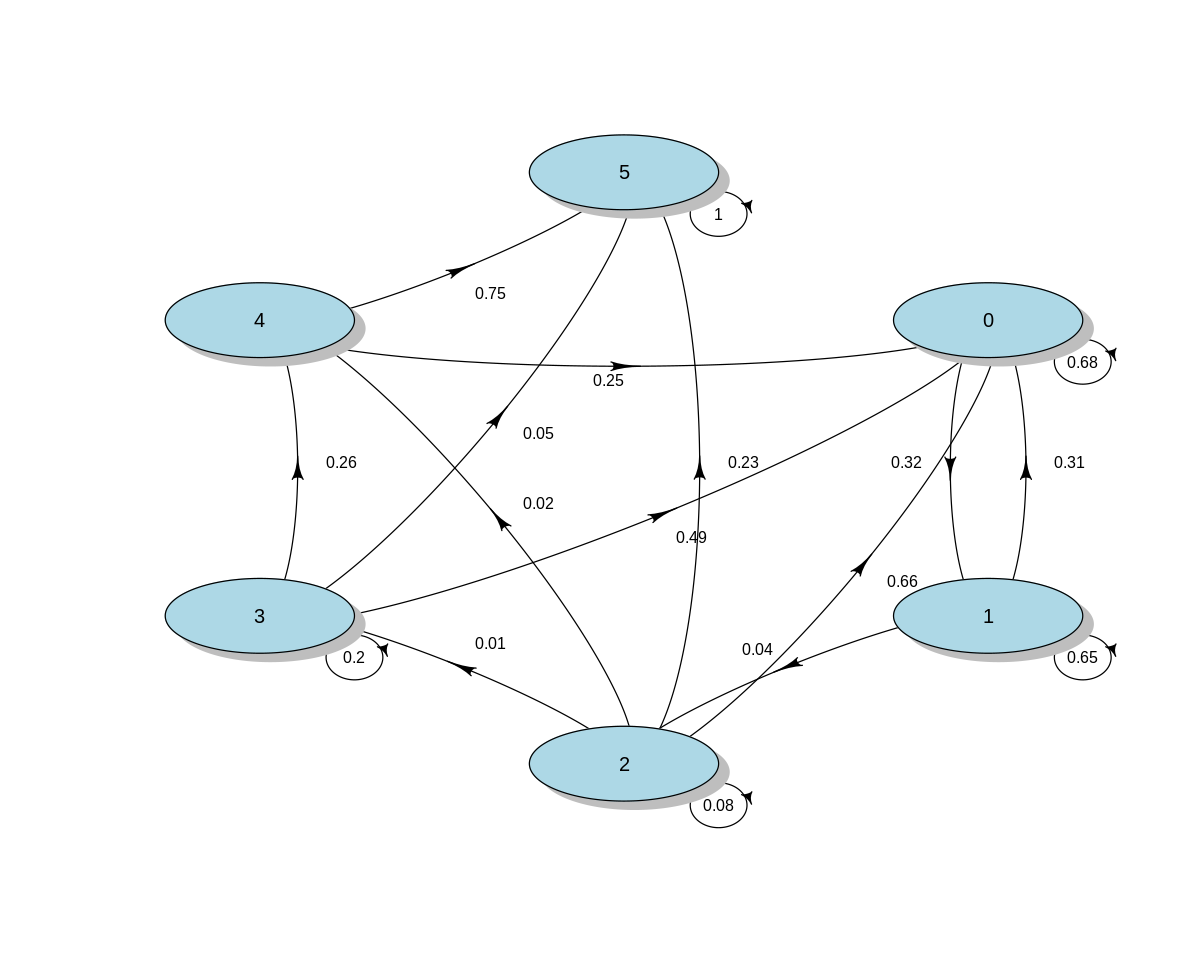

In [24]:
# Diagrama de transiciones
options(repr.plot.width=10, repr.plot.height=8)
plotmat(t(P),name=c("0","1", "2", "3", "4", "5"),
arr.length=0.3,arr.width=0.1,box.col="lightblue",box.lwd=1,box.prop=0.5,box.size=0.09,
box.type="circle",cex.txt=0.8,lwd=1,self.cex=0.3,
self.arrpos=0.3,self.shiftx=0.09,self.shifty=-0.05)

## Probabilidades de transición a n pasos

In [147]:
n.max = 1000
for(i in 1:n.max){
    Pn <- mmult(P, n=i)
    cat(paste('Matriz de probabilidades de transición a n= ', i, ' pasos \n', sep=''))
    print(Pn)
}

Matriz de probabilidades de transición a n= 1 pasos 
     [,1] [,2] [,3] [,4] [,5] [,6]
[1,] 0.68 0.32 0.00 0.00 0.00 0.00
[2,] 0.31 0.65 0.04 0.00 0.00 0.00
[3,] 0.66 0.00 0.08 0.01 0.02 0.23
[4,] 0.49 0.00 0.00 0.20 0.26 0.05
[5,] 0.25 0.00 0.00 0.00 0.00 0.75
[6,] 0.00 0.00 0.00 0.00 0.00 1.00
Matriz de probabilidades de transición a n= 2 pasos 
       [,1]   [,2]   [,3]   [,4]   [,5]   [,6]
[1,] 0.5616 0.4256 0.0128 0.0000 0.0000 0.0000
[2,] 0.4387 0.5217 0.0292 0.0004 0.0008 0.0092
[3,] 0.5115 0.2112 0.0064 0.0028 0.0042 0.2639
[4,] 0.4962 0.1568 0.0000 0.0400 0.0520 0.2550
[5,] 0.1700 0.0800 0.0000 0.0000 0.0000 0.7500
[6,] 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000
Matriz de probabilidades de transición a n= 3 pasos 
         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]
[1,] 0.522272 0.456352 0.018048 0.000128 0.000256 0.002944
[2,] 0.479711 0.479489 0.023204 0.000372 0.000688 0.016536
[3,] 0.419938 0.300960 0.008960 0.000624 0.000856 0.268662
[4,] 0.418624 0.260704 0.006272

# Distribución a n pasos

\begin{equation}
\pi^n  = \pi^{n-1} \textbf{P}  = \pi^0 \textbf{P}^n 
\end{equation}

In [143]:
# distribución inicial
di <- c(0.15, 0.15, 0.2, 0.2, 0.2, 0.1)  

# distribución a n pasos
n <- 1000
Dn <- matrix(0, ncol=ncol(P), nrow=n)

for(i in 1:n){
    Dn[i,] <- di%*%mmult(P, n=i)
    cat(paste('Distribución a n= ', i, ' pasos \n', sep=''))
    print(di%*%mmult(P, n=i))
}


Distribución a n= 1 pasos 
       [,1]   [,2]  [,3]  [,4]  [,5]  [,6]
[1,] 0.4285 0.1455 0.022 0.042 0.056 0.306
Distribución a n= 2 pasos 
         [,1]     [,2]    [,3]    [,4]    [,5]    [,6]
[1,] 0.385585 0.231695 0.00758 0.00862 0.01136 0.35516
Distribución a n= 3 pasos 
          [,1]     [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.3460899 0.273989 0.0098742 0.0017998 0.0023928 0.3658544
Distribución a n= 4 pasos 
          [,1]      [,2]       [,3]        [,4]        [,5]      [,6]
[1,] 0.3282747 0.2888416 0.01174949 0.000458702 0.000665432 0.3700101
Distribución a n= 5 pasos 
          [,1]      [,2]       [,3]         [,4]         [,5]      [,6]
[1,] 0.3209135 0.2927949 0.01249362 0.0002092353 0.0003542524 0.3732344
Distribución a n= 6 pasos 
          [,1]     [,2]       [,3]         [,4]         [,5]      [,6]
[1,] 0.3174245 0.293009 0.01271129 0.0001667833 0.0003042736 0.3763841
Distribución a n= 7 pasos 
          [,1]      [,2]       [,3]         [,4]         [,5]

In [42]:
df <- data.frame('n'=1:n, Dn)
colnames(df) <- c('n', 'S', 'E', 'H', 'U', 'I', 'D')
head(df)

,n,S,E,H,U,I,D
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4285000,0.1455000,0.02200000,0.0420000000,0.0560000000,0.3060000
2,2,0.3855850,0.2316950,0.00758000,0.0086200000,0.0113600000,0.3551600
3,3,0.3460899,0.2739890,0.00987420,0.0017998000,0.0023928000,0.3658544
4,4,0.3282747,0.2888416,0.01174949,0.0004587020,0.0006654320,0.3700101
5,5,0.3209135,0.2927949,0.01249362,0.0002092353,0.0003542524,0.3732344
6,6,0.3174245,0.2930090,0.01271129,0.0001667833,0.0003042736,0.3763841


In [43]:
df <- df %>% 
  pivot_longer(!n, names_to='State', values_to='Probability')
head(df)  

n,State,Probability
<int>,<chr>,<dbl>
1,S,0.4285
1,E,0.1455
1,H,0.0220
1,U,0.0420
1,I,0.0560
1,D,0.3060


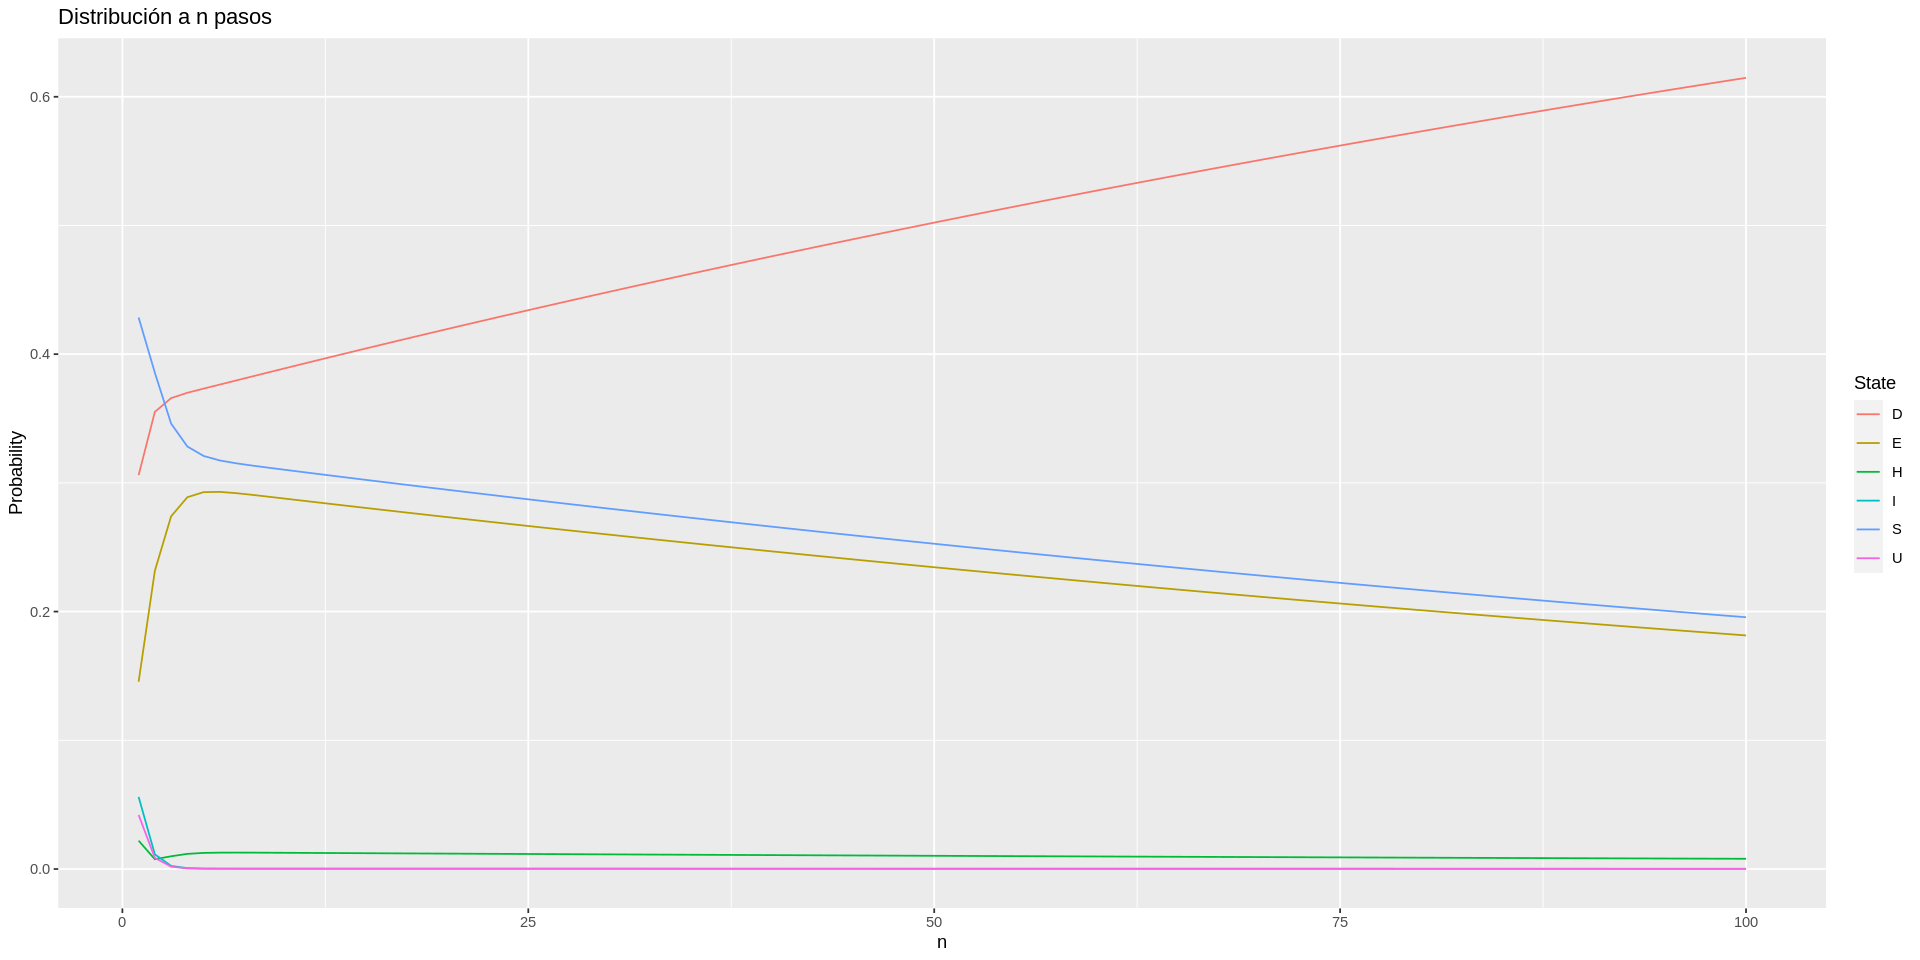

In [47]:
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df, aes(x=n, y=Probability, color=State)) +
  ggtitle('Distribución a n pasos') +
  geom_line()
p1

## Simulación de una cadena 

In [117]:
# número de pasos a generar
n = 10000
# distribución inicial
d <- c(1, 0, 0, 0, 0, 0)
# matriz de probabilidades de transición
P <- matrix(c(0.68, 0.32,    0,    0,    0, 0,
              0.31, 0.65, 0.04,    0,    0, 0,
              0.66, 0   , 0.08, 0.01, 0.02, 0.23,
              0.49, 0   , 0   , 0.20, 0.26, 0.05,
              0.25, 0   , 0   , 0   , 0   , 0.75,
              0   , 0   , 0   , 0   , 0   , 1 ), ncol=6, byrow=TRUE)

In [118]:
# simulación de una trajectoria con n = 100 pasos
sim <- sim.MarkovChain(P, d, n)
print(sim)

    [1] 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
   [37] 1 1 0 0 0 1 1 0 0 1 1 2 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0
   [73] 0 1 0 1 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [109] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [145] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [181] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [217] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [253] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [289] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [325] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [361] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [397] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  [433] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

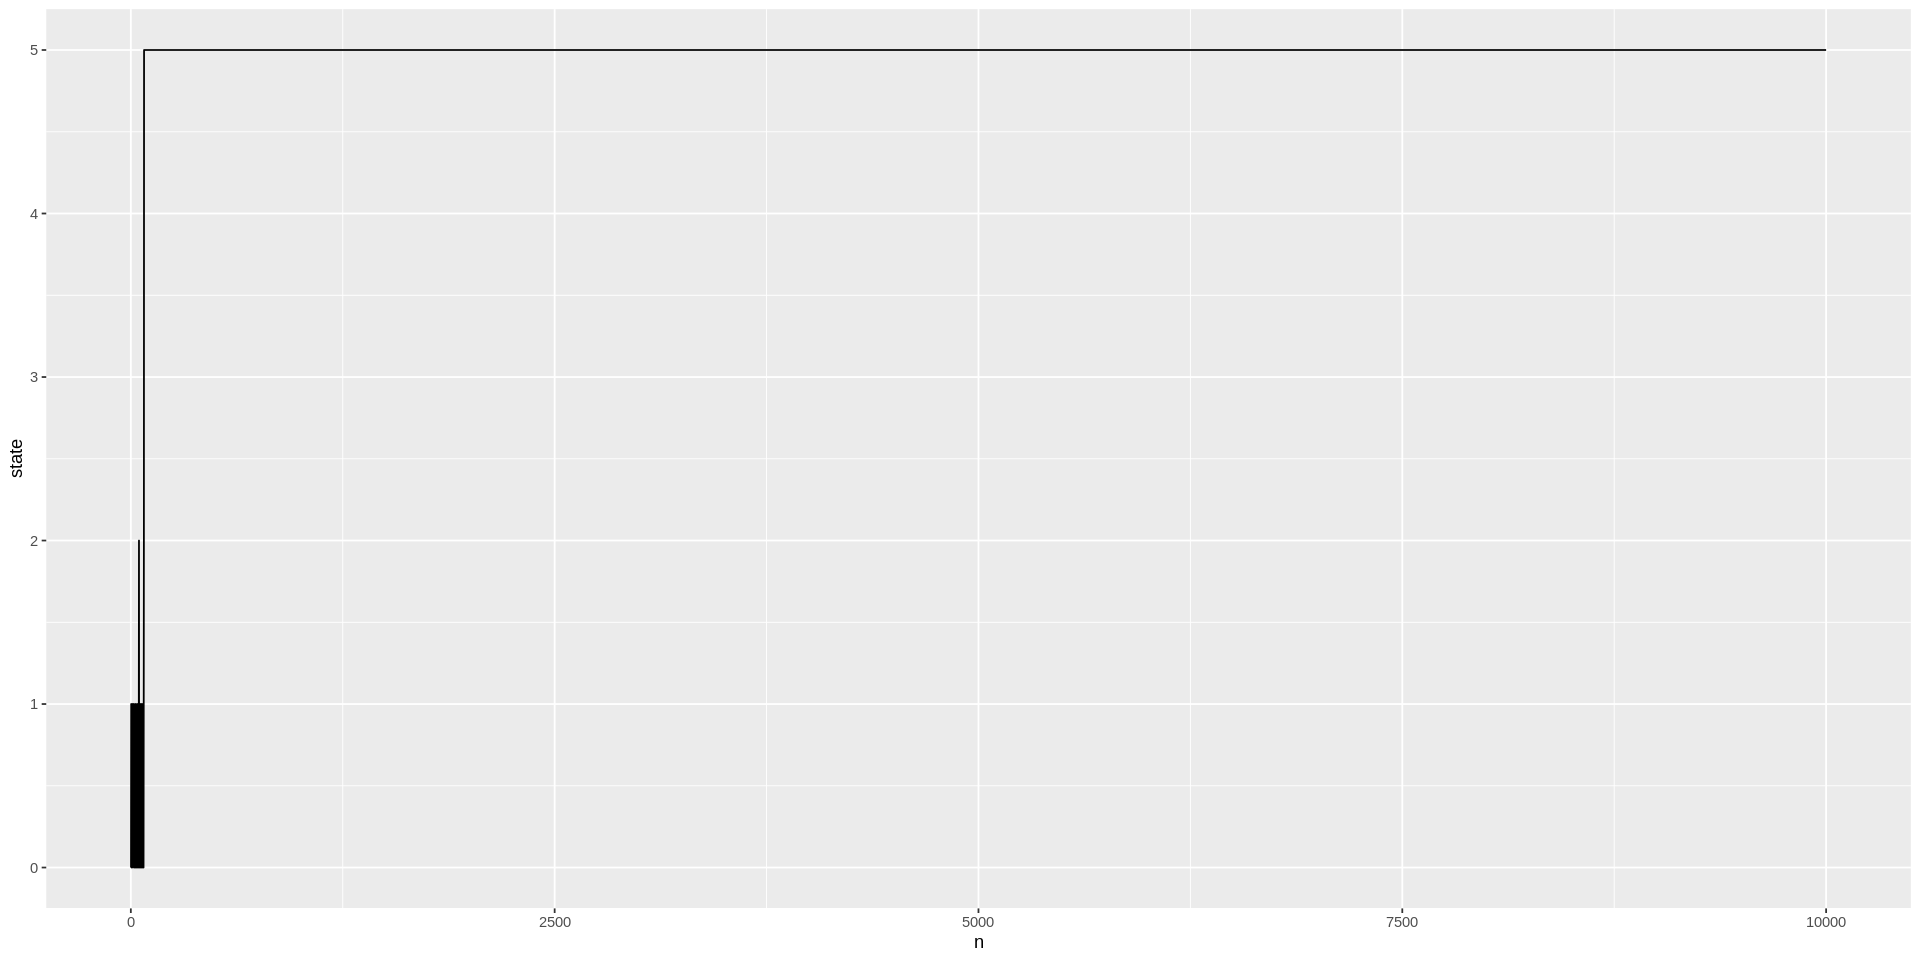

In [119]:
cm_01 <- data.frame('n'= 1:n, 'state'= sim)

# plot
p2 <- ggplot(cm_01, aes(x=n, y=state)) +
  geom_line()
p2

In [125]:
cm_01 %>% 
  group_by(state) %>%
  summarise('n'=n())%>%
  mutate('total'=sum(n),
         'Prop' = n/total)

state,n,total,Prop
<dbl>,<int>,<int>,<dbl>
0,40,10000,0.0040
1,35,10000,0.0035
2,2,10000,0.0002
5,9923,10000,0.9923


## Simulación de múltiples trajectorias

In [179]:
# número de pasos a generar
n = 100
# número de trajectorias
m = 10
# distribución inicial
d <- c(1, 0, 0, 0, 0, 0)
# matriz de probabilidades de transición
P <- matrix(c(0.68, 0.32,    0,    0,    0, 0,
              0.31, 0.65, 0.04,    0,    0, 0,
              0.66, 0   , 0.08, 0.01, 0.02, 0.23,
              0.49, 0   , 0   , 0.20, 0.26, 0.05,
              0.25, 0   , 0   , 0   , 0   , 0.75,
              0   , 0   , 0   , 0   , 0   , 1 ), ncol=6, byrow=TRUE)

In [180]:
# simulación de m trajectorias con n pasos
mat.sim <- matrix(0, ncol=n, nrow=m)
for(i in 1:m){
  mat.sim[i,] <- sim.MarkovChain(P, d, n)
}
# data.frame
df_mat_sim <- data.frame('m'= 1:m, mat.sim)
# colnames
colnames(df_mat_sim) <- c('m', sapply(1:n, function(i) paste('S_',i, sep='')))
head(df_mat_sim)

,m,S_1,S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9,⋯,S_91,S_92,S_93,S_94,S_95,S_96,S_97,S_98,S_99,S_100
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,1,1,0,0,0,0,0,⋯,1,0,0,1,1,1,0,1,0,0
2,2,0,0,0,1,1,1,1,1,1,⋯,5,5,5,5,5,5,5,5,5,5
3,3,0,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,1
4,4,0,0,1,1,2,0,0,0,0,⋯,1,1,1,1,1,2,5,5,5,5
5,5,0,0,1,0,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
6,6,0,0,0,0,0,0,1,1,0,⋯,1,0,0,1,1,0,1,0,0,0


In [181]:
df_final <- df_mat_sim %>%
  pivot_longer(!m, names_to='Step', values_to='value') %>%
  mutate(Step = as.numeric(substring(Step,3,10))) %>%
  mutate(m = as.character(m))
 head(df_final) 

m,Step,value
<chr>,<dbl>,<dbl>
1,1,0
1,2,0
1,3,1
1,4,1
1,5,0
1,6,0


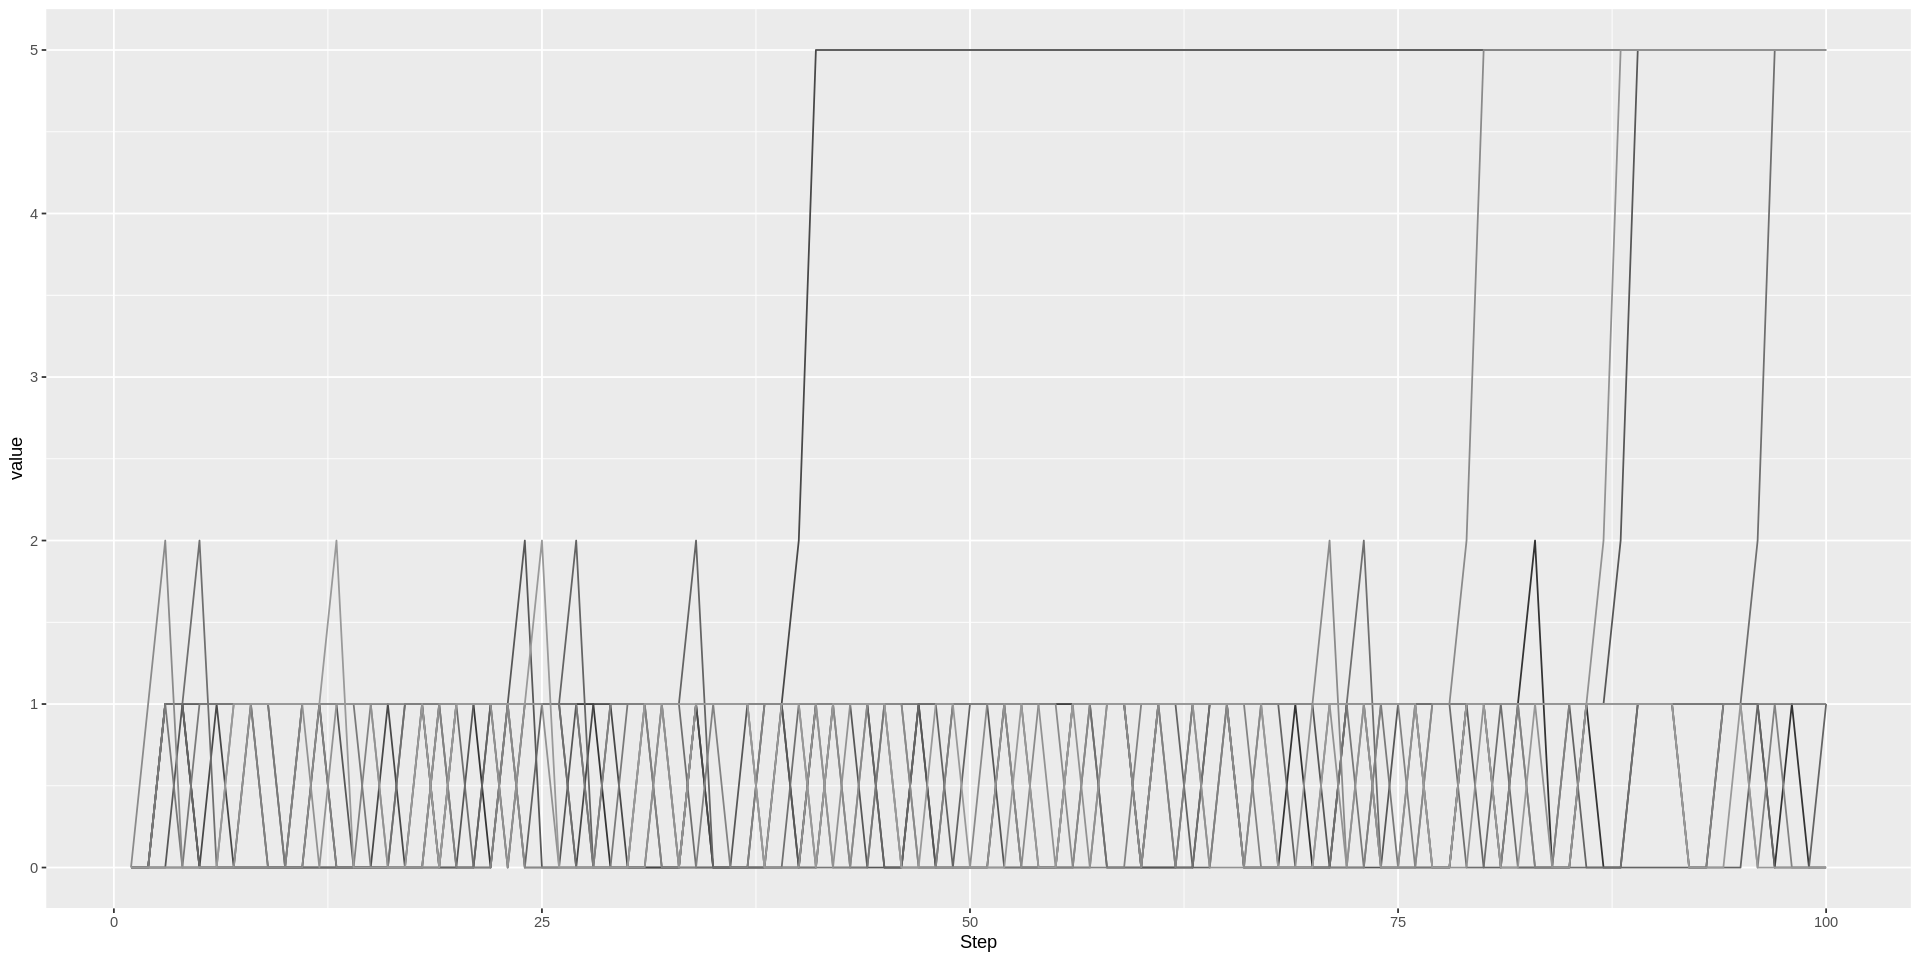

In [182]:
# gráfico de múltiples trayectorias
p5 <- ggplot(df_final, aes(x=Step, y=value, color=m)) +
  geom_line() +
  scale_colour_grey(start = 0.2,end = 0.6) +
  theme(legend.position="none") 
  
p5

## Simulación de una cadena suponiendo inicia en estado diferente.

In [148]:
# número de pasos a generar
n = 1000
# distribución inicial
d <- list('state0'=c(1, 0, 0, 0, 0, 0),
          'state1'=c(0, 1, 0, 0, 0, 0),
          'state2'=c(0, 0, 1, 0, 0, 0),
          'state3'=c(0, 0, 0, 1, 0, 0),
          'state4'=c(0, 0, 0, 0, 1, 0),
          'state5'=c(0, 0, 0, 0, 0, 1))
# nombre de estado          
names <- names(d)
# matriz de probabilidades de transición
P <- matrix(c(0.68, 0.32,    0,    0,    0, 0,
              0.31, 0.65, 0.04,    0,    0, 0,
              0.66, 0   , 0.08, 0.01, 0.02, 0.23,
              0.49, 0   , 0   , 0.20, 0.26, 0.05,
              0.25, 0   , 0   , 0   , 0   , 0.75,
              0   , 0   , 0   , 0   , 0   , 1 ), ncol=6, byrow=TRUE)

In [149]:
# simulación de una trajectoria con n = 100 pasos
sim_01 <- sim.MarkovChain(P, d[[1]], n)
#print(sim_01)
cm_n <- data.frame('state.ini'= names[1], 'n'= 1:n, 'state.fin'= sim_01)
for(i in 2:length(d)){
  sim_i <- sim.MarkovChain(P, d[[i]], n)
  cm_i <- data.frame('state.ini'= names[i], 'n'= 1:n, 'state.fin'= sim_i)
  cm_n <- rbind(cm_n, cm_i)
}
head(cm_n)

,state.ini,n,state.fin
,<chr>,<int>,<dbl>
1,state0,1,0
2,state0,2,0
3,state0,3,0
4,state0,4,0
5,state0,5,0
6,state0,6,1


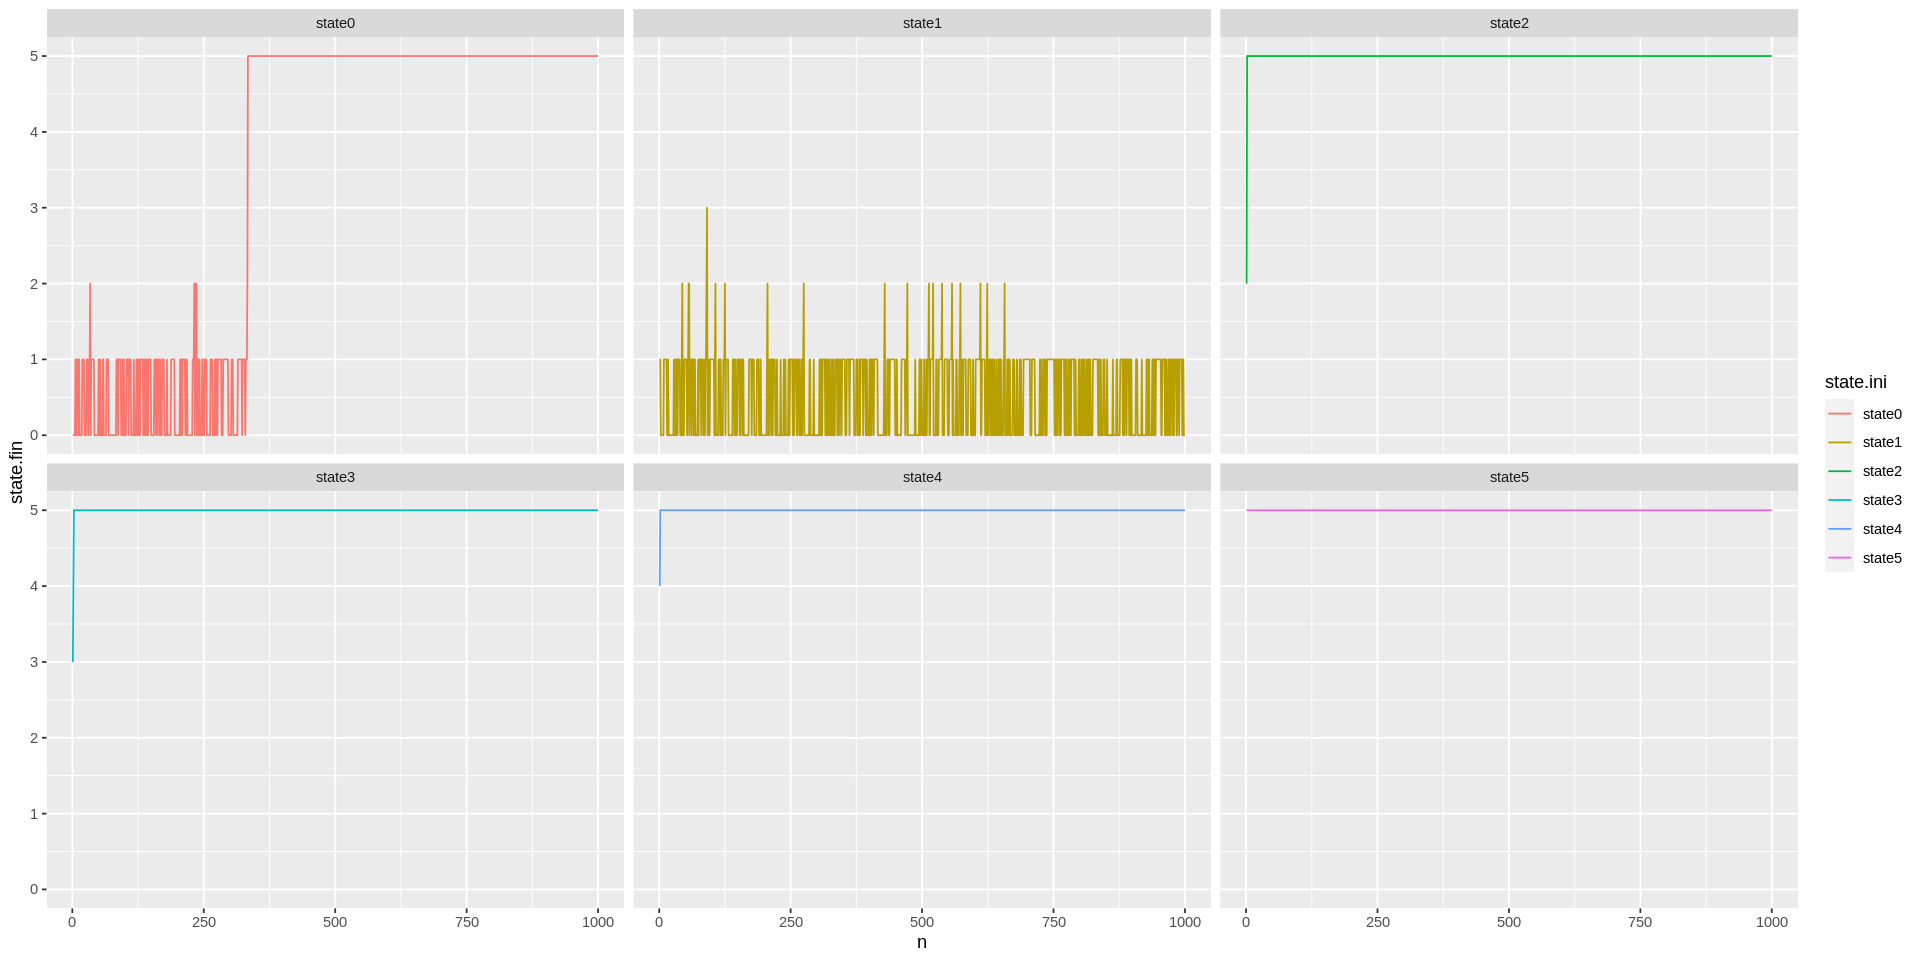

In [150]:
# plot
p2 <- ggplot(cm_n, aes(x=n, y=state.fin, col=state.ini)) +
  geom_line() +
  facet_wrap(~state.ini, nrow = 2)
p2

In [156]:
#  
cm_n %>% 
  group_by(state.ini, state.fin) %>%
  summarise('n'=n())%>%
  mutate('total'=sum(n),
         'Prop' = n/total) %>%
  select(-n, -total) %>%
  pivot_wider(names_from='state.fin', values_from='Prop', values_fill = 0)


`summarise()` has grouped output by 'state.ini'. You can override using the
`.groups` argument.


state.ini,0,1,2,5,3,4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
state0,0.174,0.154,0.005,0.667,0.000,0.000
state1,0.510,0.471,0.018,0.000,0.001,0.000
state2,0.000,0.000,0.001,0.999,0.000,0.000
state3,0.000,0.000,0.000,0.998,0.001,0.001
state4,0.000,0.000,0.000,0.999,0.000,0.001
state5,0.000,0.000,0.000,1.000,0.000,0.000


In [157]:
#  
cm_n %>% 
  group_by(state.ini, state.fin) %>%
  summarise('n'=n())%>%
  mutate('total'=sum(n),
         'Prop' = total/n) %>%
  select(-n, -total) %>%
  pivot_wider(names_from='state.fin', values_from='Prop', values_fill = 0)

`summarise()` has grouped output by 'state.ini'. You can override using the
`.groups` argument.


state.ini,0,1,2,5,3,4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
state0,5.747126,6.493506,200.00000,1.499250,0,0
state1,1.960784,2.123142,55.55556,0.000000,1000,0
state2,0.000000,0.000000,1000.00000,1.001001,0,0
state3,0.000000,0.000000,0.00000,1.002004,1000,1000
state4,0.000000,0.000000,0.00000,1.001001,0,1000
state5,0.000000,0.000000,0.00000,1.000000,0,0
